# Task 3: Customer Segmentation / Clustering 
Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv)
● You have the flexibility to choose any clustering algorithm and any number of clusters in 
between(2 and 10)  
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this). 
● Visualise your clusters using relevant plots. 

Deliverables: 

● A report on your clustering results, including: 
○ The number of clusters formed. 
○ DB Index value. 
○ Other relevant clustering metrics. 
● A Jupyter Notebook/Python script containing your clustering code.  


In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
# Merge datasets
merged = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [3]:
# Convert dates to datetime
merged['SignupDate'] = pd.to_datetime(merged['SignupDate'])
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])

# Calculate tenure 
reference_date = pd.to_datetime('2025-01-01')
merged['Tenure'] = (reference_date - merged['SignupDate']).dt.days

# Aggregate customer-level features
features = merged.groupby('CustomerID').agg({
    'Quantity': 'sum',            # Total items purchased
    'TotalValue': 'sum',          # Total money spent
    'Tenure': 'mean'              # Average tenure
}).reset_index()

print(features.head())

  CustomerID  Quantity  TotalValue  Tenure
0      C0001        12     3354.52   906.0
1      C0002        10     1862.74  1053.0
2      C0003        14     2725.38   300.0
3      C0004        23     5354.88   815.0
4      C0005         7     2034.24   870.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Quantity', 'TotalValue', 'Tenure']])

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

db_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_indices.append(db_index)

# Find the best number of clusters
best_k = cluster_range[db_indices.index(min(db_indices))]
print(f"Best Number of Clusters: {best_k}")
print(f"Lowest DB Index: {min(db_indices)}")


Best Number of Clusters: 4
Lowest DB Index: 0.8332101559650618


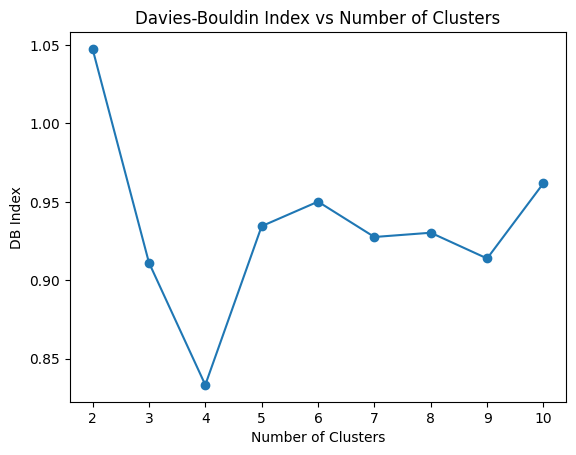

In [6]:
import matplotlib.pyplot as plt
plt.plot(cluster_range, db_indices, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()


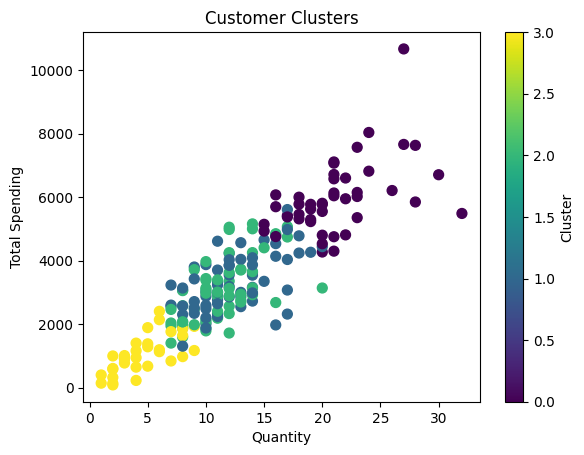

In [8]:
plt.scatter(features['Quantity'], features['TotalValue'], c=features['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Quantity')
plt.ylabel('Total Spending')
plt.title('Customer Clusters')
plt.savefig('cluster_scatterplot.png')


In [7]:
# Perform final clustering
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
features['Cluster'] = final_kmeans.fit_predict(scaled_features)

features.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to Customer_Clusters.csv")


Clustering results saved to Customer_Clusters.csv
